In [1]:
MAX_LEN = 256
bs = 32

In [2]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
xlm_roberta_path = '/content/drive/MyDrive/XLMRoberta/final_xlmroberta_for_eval_V1.conll'


In [11]:
def read_conll_file(file_path):
    data = []
    current_sentence = []
    with open(file_path, "r", encoding="utf-8") as file:
        for line in file:
            line = line.strip()
            if line.startswith('-DOCSTART-'):
                continue
            if line:
                parts = line.split()
                word = parts[0]
                gold_label = parts[-2]
                pred_label = parts[-1]
                current_sentence.append((word, gold_label, pred_label))
            else:
                if current_sentence:
                    data.append(current_sentence)
                    current_sentence = []
    if current_sentence:
        data.append(current_sentence)
    return data

In [12]:
xlm_roberta = read_conll_file(xlm_roberta_path)
print(xlm_roberta)

[[('▁Mar', 'O', 'O'), ('▁a', 'O', 'O'), ('▁t', 'O', 'O'), ('ch', 'O', 'O'), ('ítear', 'O', 'O'), ('▁do', 'O', 'O'), ('▁She', 'B-PER', 'B-PER'), ('os', 'B-PER', 'B-PER'), ('amh', 'B-PER', 'B-PER'), ('▁Mac', 'I-PER', 'I-PER'), ('▁Gri', 'I-PER', 'I-PER'), ('anna', 'I-PER', 'I-PER'), ('▁é', 'O', 'O'), ('▁ca', 'O', 'O'), ('ithfidh', 'O', 'O'), ('▁an', 'O', 'O'), ('▁t', 'O', 'O'), ('-', 'O', 'O'), ('ealaí', 'O', 'O'), ('on', 'O', 'O'), ('tóir', 'O', 'O'), ('▁an', 'O', 'O'), ('▁sola', 'O', 'O'), ('s', 'O', 'O'), ('▁a', 'O', 'O'), ('▁thabhairt', 'O', 'O'), ('▁don', 'O', 'O'), ('▁saol', 'O', 'O'), ('▁agus', 'O', 'O'), ('▁di', 'O', 'O'), ('úl', 'O', 'O'), ('tú', 'O', 'O'), ('▁do', 'O', 'O'), ('▁cha', 'O', 'O'), ('thú', 'O', 'O'), ('▁sin', 'O', 'O'), ('▁na', 'O', 'O'), ('▁tru', 'O', 'O'), ('a', 'O', 'O'), ('ill', 'O', 'O'), ('íochta', 'O', 'O'), ('▁a', 'O', 'O'), ('▁chuirean', 'O', 'O'), ('n', 'O', 'O'), ('▁an', 'O', 'O'), ('▁saol', 'O', 'O'), ('▁ina', 'O', 'O'), ('▁cho', 'O', 'O'), ('s', 'O', 'O

In [14]:
incorrect_xlmroberta = {}

i = 0
while i < len(xlm_roberta):
  sentence = xlm_roberta[i]
  incorrects = []
  for tup in sentence:
    word, gold, pred = tup
    if gold != pred:
      incorrects.append((tup))
  incorrect_xlmroberta[i] = incorrects
  i += 1

incorrect_xlmroberta= {k: v for k, v in incorrect_xlmroberta.items() if v}
print(incorrect_xlmroberta)

{4: [('▁P', 'B-ORG', 'O'), ('áistí', 'B-ORG', 'O'), ('▁Na', 'I-ORG', 'B-ORG'), ('í', 'I-ORG', 'B-ORG'), ('scoil', 'I-ORG', 'B-ORG'), ('▁an', 'I-ORG', 'O'), ('▁L', 'I-ORG', 'B-ORG'), ('ó', 'I-ORG', 'B-ORG'), ('iste', 'I-ORG', 'B-ORG')], 5: [('▁Ard', 'O', 'B-PER'), ('-', 'O', 'B-PER'), ('Che', 'O', 'B-PER'), ('anna', 'O', 'B-PER'), ('saí', 'O', 'B-PER'), ('▁M', 'O', 'B-PER'), ('hara', 'O', 'B-PER'), ('s', 'O', 'B-PER'), ('cal', 'O', 'B-PER'), ('▁Mach', 'O', 'I-PER'), ('aire', 'O', 'I-PER')], 6: [('▁Cha', 'B-PER', 'B-ORG'), ('it', 'B-PER', 'B-ORG'), ('lín', 'B-PER', 'B-ORG'), ('▁Mau', 'I-PER', 'I-ORG'), ('de', 'I-PER', 'I-ORG')], 7: [('▁Bean', 'O', 'B-PER'), ('▁Uí', 'B-PER', 'I-PER'), ('▁', 'I-LOC', 'O'), ('▁Co', 'I-LOC', 'B-LOC'), ('.', 'I-LOC', 'B-LOC')], 8: [('gate', 'B-ORG', 'I-ORG')], 9: [('▁Lig', 'O', 'B-PER'), ('▁Sinn', 'O', 'I-PER'), ('▁Bhr', 'B-PER', 'B-LOC'), ('e', 'B-PER', 'B-LOC'), ('and', 'B-PER', 'B-LOC'), ('áin', 'B-PER', 'B-LOC')], 13: [('▁Rose', 'B-PER', 'B-ORG')], 17: [(

# XLM_Roberta

In [15]:
incorrect_xlmroberta = {}

i = 0
while i < len(xlm_roberta):
  sentence = xlm_roberta[i]
  incorrects = []
  for tup in sentence:
    word, gold, pred = tup
    if gold != pred:
      incorrects.append((tup))
  incorrect_xlmroberta[i] = incorrects
  i += 1

incorrect_xlmroberta= {k: v for k, v in incorrect_xlmroberta.items() if v}
print(incorrect_xlmroberta)

{4: [('▁P', 'B-ORG', 'O'), ('áistí', 'B-ORG', 'O'), ('▁Na', 'I-ORG', 'B-ORG'), ('í', 'I-ORG', 'B-ORG'), ('scoil', 'I-ORG', 'B-ORG'), ('▁an', 'I-ORG', 'O'), ('▁L', 'I-ORG', 'B-ORG'), ('ó', 'I-ORG', 'B-ORG'), ('iste', 'I-ORG', 'B-ORG')], 5: [('▁Ard', 'O', 'B-PER'), ('-', 'O', 'B-PER'), ('Che', 'O', 'B-PER'), ('anna', 'O', 'B-PER'), ('saí', 'O', 'B-PER'), ('▁M', 'O', 'B-PER'), ('hara', 'O', 'B-PER'), ('s', 'O', 'B-PER'), ('cal', 'O', 'B-PER'), ('▁Mach', 'O', 'I-PER'), ('aire', 'O', 'I-PER')], 6: [('▁Cha', 'B-PER', 'B-ORG'), ('it', 'B-PER', 'B-ORG'), ('lín', 'B-PER', 'B-ORG'), ('▁Mau', 'I-PER', 'I-ORG'), ('de', 'I-PER', 'I-ORG')], 7: [('▁Bean', 'O', 'B-PER'), ('▁Uí', 'B-PER', 'I-PER'), ('▁', 'I-LOC', 'O'), ('▁Co', 'I-LOC', 'B-LOC'), ('.', 'I-LOC', 'B-LOC')], 8: [('gate', 'B-ORG', 'I-ORG')], 9: [('▁Lig', 'O', 'B-PER'), ('▁Sinn', 'O', 'I-PER'), ('▁Bhr', 'B-PER', 'B-LOC'), ('e', 'B-PER', 'B-LOC'), ('and', 'B-PER', 'B-LOC'), ('áin', 'B-PER', 'B-LOC')], 13: [('▁Rose', 'B-PER', 'B-ORG')], 17: [(

In [16]:
print(len(incorrect_xlmroberta.values()))

71


In [17]:
print(incorrect_xlmroberta.values())

dict_values([[('▁P', 'B-ORG', 'O'), ('áistí', 'B-ORG', 'O'), ('▁Na', 'I-ORG', 'B-ORG'), ('í', 'I-ORG', 'B-ORG'), ('scoil', 'I-ORG', 'B-ORG'), ('▁an', 'I-ORG', 'O'), ('▁L', 'I-ORG', 'B-ORG'), ('ó', 'I-ORG', 'B-ORG'), ('iste', 'I-ORG', 'B-ORG')], [('▁Ard', 'O', 'B-PER'), ('-', 'O', 'B-PER'), ('Che', 'O', 'B-PER'), ('anna', 'O', 'B-PER'), ('saí', 'O', 'B-PER'), ('▁M', 'O', 'B-PER'), ('hara', 'O', 'B-PER'), ('s', 'O', 'B-PER'), ('cal', 'O', 'B-PER'), ('▁Mach', 'O', 'I-PER'), ('aire', 'O', 'I-PER')], [('▁Cha', 'B-PER', 'B-ORG'), ('it', 'B-PER', 'B-ORG'), ('lín', 'B-PER', 'B-ORG'), ('▁Mau', 'I-PER', 'I-ORG'), ('de', 'I-PER', 'I-ORG')], [('▁Bean', 'O', 'B-PER'), ('▁Uí', 'B-PER', 'I-PER'), ('▁', 'I-LOC', 'O'), ('▁Co', 'I-LOC', 'B-LOC'), ('.', 'I-LOC', 'B-LOC')], [('gate', 'B-ORG', 'I-ORG')], [('▁Lig', 'O', 'B-PER'), ('▁Sinn', 'O', 'I-PER'), ('▁Bhr', 'B-PER', 'B-LOC'), ('e', 'B-PER', 'B-LOC'), ('and', 'B-PER', 'B-LOC'), ('áin', 'B-PER', 'B-LOC')], [('▁Rose', 'B-PER', 'B-ORG')], [('▁Quart', 'B-L

In [18]:
correct_xlmroberta = {}

i = 0
while i < len(xlm_roberta):
  sentence = xlm_roberta[i]
  corrects = []
  for tup in sentence:
    word, gold, pred = tup
    if gold == pred:
      corrects.append((tup))
  correct_xlmroberta[i] = corrects
  i += 1

correct_xlmroberta= {k: v for k, v in correct_xlmroberta.items() if v}
print(correct_xlmroberta)

{0: [('▁Mar', 'O', 'O'), ('▁a', 'O', 'O'), ('▁t', 'O', 'O'), ('ch', 'O', 'O'), ('ítear', 'O', 'O'), ('▁do', 'O', 'O'), ('▁She', 'B-PER', 'B-PER'), ('os', 'B-PER', 'B-PER'), ('amh', 'B-PER', 'B-PER'), ('▁Mac', 'I-PER', 'I-PER'), ('▁Gri', 'I-PER', 'I-PER'), ('anna', 'I-PER', 'I-PER'), ('▁é', 'O', 'O'), ('▁ca', 'O', 'O'), ('ithfidh', 'O', 'O'), ('▁an', 'O', 'O'), ('▁t', 'O', 'O'), ('-', 'O', 'O'), ('ealaí', 'O', 'O'), ('on', 'O', 'O'), ('tóir', 'O', 'O'), ('▁an', 'O', 'O'), ('▁sola', 'O', 'O'), ('s', 'O', 'O'), ('▁a', 'O', 'O'), ('▁thabhairt', 'O', 'O'), ('▁don', 'O', 'O'), ('▁saol', 'O', 'O'), ('▁agus', 'O', 'O'), ('▁di', 'O', 'O'), ('úl', 'O', 'O'), ('tú', 'O', 'O'), ('▁do', 'O', 'O'), ('▁cha', 'O', 'O'), ('thú', 'O', 'O'), ('▁sin', 'O', 'O'), ('▁na', 'O', 'O'), ('▁tru', 'O', 'O'), ('a', 'O', 'O'), ('ill', 'O', 'O'), ('íochta', 'O', 'O'), ('▁a', 'O', 'O'), ('▁chuirean', 'O', 'O'), ('n', 'O', 'O'), ('▁an', 'O', 'O'), ('▁saol', 'O', 'O'), ('▁ina', 'O', 'O'), ('▁cho', 'O', 'O'), ('s', 'O',

# Number of tokens

In [19]:
vals = []
for k, v in incorrect_xlmroberta.items():
    for val in v:
        vals.append(val)

print(len(vals))


467


In [20]:
cor = []
for k, v in correct_xlmroberta.items():
    for val in v:
        cor.append(val)

print(len(cor))


6251


In [21]:
total_tokens = sum(len(sentence) for sentence in xlm_roberta)
total_tokens

6718

# Other

In [22]:
# Initialize lists to store incorrectly labeled entities
incorrect_loc = []
incorrect_org = []
incorrect_per = []

# Iterate through the dictionary
for key, value_list in incorrect_xlmroberta.items():
    for value in value_list:
        token, true_label, predicted_label = value
        # Append to the respective list based on the predicted incorrect label
        if true_label != predicted_label:  # Check if there's a labeling mismatch
            if 'LOC' in predicted_label:  # Adjust these conditions if necessary
                incorrect_loc.append((token, true_label, predicted_label))
            elif 'ORG' in predicted_label:
                incorrect_org.append((token, true_label, predicted_label))
            elif 'PER' in predicted_label:
                incorrect_per.append((token, true_label, predicted_label))

# Print the results
print("Incorrectly labeled as LOC:", incorrect_loc)
print("Incorrectly labeled as ORG:", incorrect_org)
print("Incorrectly labeled as PER:", incorrect_per)


Incorrectly labeled as LOC: [('▁Co', 'I-LOC', 'B-LOC'), ('.', 'I-LOC', 'B-LOC'), ('▁Bhr', 'B-PER', 'B-LOC'), ('e', 'B-PER', 'B-LOC'), ('and', 'B-PER', 'B-LOC'), ('áin', 'B-PER', 'B-LOC'), ('▁(', 'O', 'B-LOC'), ('▁Bhaile', 'B-LOC', 'I-LOC'), ('▁(', 'O', 'B-LOC'), ('▁Bhaile', 'B-LOC', 'I-LOC'), ('▁(', 'O', 'B-LOC'), ('▁Bhaile', 'B-LOC', 'I-LOC'), ('▁)', 'O', 'B-LOC'), ('▁(', 'O', 'B-LOC'), ('▁Bhaile', 'B-LOC', 'I-LOC'), ('▁(', 'O', 'B-LOC'), ('▁Bhaile', 'B-LOC', 'I-LOC'), ('▁)', 'O', 'B-LOC'), ('M', 'B-LOC', 'I-LOC'), ('em', 'B-LOC', 'I-LOC'), (',', 'O', 'B-LOC'), ('n', 'B-LOC', 'I-LOC'), ('▁(', 'O', 'B-LOC'), ('▁Bhaile', 'B-LOC', 'I-LOC'), ('▁)', 'O', 'B-LOC'), ('em', 'B-LOC', 'I-LOC'), (',', 'I-LOC', 'B-LOC'), ('▁S', 'I-LOC', 'B-LOC'), ('▁(', 'O', 'B-LOC'), ('▁Bhaile', 'B-LOC', 'I-LOC'), ('▁(', 'O', 'B-LOC'), ('▁Ti', 'B-ORG', 'B-LOC'), ('obra', 'B-ORG', 'B-LOC'), ('id', 'B-ORG', 'B-LOC'), ('▁Ár', 'I-ORG', 'I-LOC'), ('ann', 'I-ORG', 'I-LOC'), ('▁Lu', 'B-ORG', 'B-LOC'), ('im', 'B-ORG', '

In [23]:
mislabeled_as_o = []

# Iterate through the dictionary
for key, value_list in incorrect_xlmroberta.items():
    for value in value_list:
        token, true_label, predicted_label = value
        # Check if the true label is an entity and the predicted label is 'O'
        if true_label != 'O' and predicted_label == 'O':
            mislabeled_as_o.append((token, true_label, predicted_label))

# Print the results
print("Entities mislabeled as non-entity 'O':", mislabeled_as_o)
print("Total mislabeled as 'O':", len(mislabeled_as_o))


Entities mislabeled as non-entity 'O': [('▁P', 'B-ORG', 'O'), ('áistí', 'B-ORG', 'O'), ('▁an', 'I-ORG', 'O'), ('▁', 'I-LOC', 'O'), ('▁Ce', 'B-ORG', 'O'), ('arta', 'B-ORG', 'O'), ('▁da', 'I-ORG', 'O'), ('on', 'I-ORG', 'O'), ('na', 'I-ORG', 'O'), ('▁Bu', 'I-ORG', 'O'), ('nú', 'I-ORG', 'O'), ('▁comhlacht', 'I-ORG', 'O'), ('aí', 'I-ORG', 'O'), ('▁de', 'I-ORG', 'O'), ('on', 'I-ORG', 'O'), ('acha', 'I-ORG', 'O'), ('▁Cú', 'I-ORG', 'O'), ('it', 'I-ORG', 'O'), ('eamh', 'I-ORG', 'O'), ('▁timp', 'I-ORG', 'O'), ('iste', 'I-ORG', 'O'), ('▁hÉireann', 'I-ORG', 'O'), ('▁Cliath', 'I-LOC', 'O'), ('▁Náisiúnta', 'I-LOC', 'O'), ('▁Cliath', 'I-LOC', 'O'), ('▁hÉireann', 'I-LOC', 'O'), ('▁Cliath', 'I-LOC', 'O'), ('tha', 'I-LOC', 'O'), ('▁Cliath', 'I-LOC', 'O'), ('▁hÉireann', 'I-LOC', 'O'), ('▁Cliath', 'I-LOC', 'O'), ('▁hÉireann', 'I-LOC', 'O'), ('áin', 'I-LOC', 'O'), ('▁Cliath', 'I-LOC', 'O'), ('▁hÉireann', 'I-LOC', 'O'), ('▁', 'I-LOC', 'O'), ('▁Dara', 'I-LOC', 'O'), ('▁Cliath', 'I-LOC', 'O'), ('▁Archive', 'I

Mislablled_O

In [24]:
mislabeled_o = []

# Iterate through the dictionary
for key, value_list in incorrect_xlmroberta.items():
    for value in value_list:
        token, true_label, predicted_label = value
        # Check if the true label is PER and the predicted label is incorrect
        if true_label == 'O' and true_label != predicted_label:
            mislabeled_o.append((token, true_label, predicted_label))

# Print the results
print("Mislabeled O entities:", mislabeled_o)
print(len(mislabeled_o))

Mislabeled O entities: [('▁Ard', 'O', 'B-PER'), ('-', 'O', 'B-PER'), ('Che', 'O', 'B-PER'), ('anna', 'O', 'B-PER'), ('saí', 'O', 'B-PER'), ('▁M', 'O', 'B-PER'), ('hara', 'O', 'B-PER'), ('s', 'O', 'B-PER'), ('cal', 'O', 'B-PER'), ('▁Mach', 'O', 'I-PER'), ('aire', 'O', 'I-PER'), ('▁Bean', 'O', 'B-PER'), ('▁Lig', 'O', 'B-PER'), ('▁Sinn', 'O', 'I-PER'), ('▁Cho', 'O', 'B-ORG'), ('im', 'O', 'B-ORG'), ('▁ras', 'O', 'B-PER'), ('▁(', 'O', 'B-LOC'), ('▁)', 'O', 'B-ORG'), ('▁(', 'O', 'B-LOC'), ('▁)', 'O', 'B-ORG'), ('▁(', 'O', 'B-LOC'), ('▁)', 'O', 'B-LOC'), ('▁(', 'O', 'B-LOC'), ('▁)', 'O', 'B-ORG'), ('▁(', 'O', 'B-LOC'), ('▁)', 'O', 'B-LOC'), (',', 'O', 'B-LOC'), ('▁(', 'O', 'B-LOC'), ('▁)', 'O', 'B-LOC'), ('▁(', 'O', 'B-LOC'), ('▁)', 'O', 'B-ORG'), ('▁(', 'O', 'B-LOC'), ('▁Bhi', 'O', 'B-ORG'), ('nse', 'O', 'B-ORG'), ('▁Fi', 'O', 'I-ORG'), ('os', 'O', 'I-ORG'), ('raithe', 'O', 'I-ORG'), ('▁do', 'O', 'B-LOC'), ('▁Cho', 'O', 'B-ORG'), ('n', 'O', 'B-ORG'), ('artha', 'O', 'B-ORG'), ('▁Sta', 'O', 'B

Mislablled Org

In [25]:
mislabeled_org = []

# Iterate through the dictionary
for key, value_list in incorrect_xlmroberta.items():
    for value in value_list:
        token, true_label, predicted_label = value
        # Check if the true label is PER and the predicted label is incorrect
        if (true_label == 'B-ORG' or true_label == "I-ORG") and true_label != predicted_label:
            mislabeled_org.append((token, true_label, predicted_label))

# Print the results
print("Mislabeled ORG entities:", mislabeled_org)
print(len(mislabeled_org))

Mislabeled ORG entities: [('▁P', 'B-ORG', 'O'), ('áistí', 'B-ORG', 'O'), ('▁Na', 'I-ORG', 'B-ORG'), ('í', 'I-ORG', 'B-ORG'), ('scoil', 'I-ORG', 'B-ORG'), ('▁an', 'I-ORG', 'O'), ('▁L', 'I-ORG', 'B-ORG'), ('ó', 'I-ORG', 'B-ORG'), ('iste', 'I-ORG', 'B-ORG'), ('gate', 'B-ORG', 'I-ORG'), ('▁Ce', 'B-ORG', 'O'), ('arta', 'B-ORG', 'O'), ('▁da', 'I-ORG', 'O'), ('on', 'I-ORG', 'O'), ('na', 'I-ORG', 'O'), ('▁Bu', 'I-ORG', 'O'), ('nú', 'I-ORG', 'O'), ('▁comhlacht', 'I-ORG', 'O'), ('aí', 'I-ORG', 'O'), ('▁de', 'I-ORG', 'O'), ('on', 'I-ORG', 'O'), ('acha', 'I-ORG', 'O'), ('▁Cú', 'I-ORG', 'O'), ('it', 'I-ORG', 'O'), ('eamh', 'I-ORG', 'O'), ('▁timp', 'I-ORG', 'O'), ('iste', 'I-ORG', 'O'), ('▁Comhairle', 'I-ORG', 'B-ORG'), ('▁Nu', 'B-ORG', 'B-PER'), ('a', 'B-ORG', 'B-PER'), ('-', 'B-ORG', 'B-PER'), ('E', 'B-ORG', 'B-PER'), ('ala', 'B-ORG', 'B-PER'), ('í', 'B-ORG', 'B-PER'), ('ne', 'B-ORG', 'I-ORG'), ('▁hÉireann', 'I-ORG', 'O'), ('▁Ti', 'B-ORG', 'B-LOC'), ('obra', 'B-ORG', 'B-LOC'), ('id', 'B-ORG', 'B-L

Misslabelled loc

In [26]:
mislabeled_loc = []

# Iterate through the dictionary
for key, value_list in incorrect_xlmroberta.items():
    for value in value_list:
        token, true_label, predicted_label = value
        # Check if the true label is PER and the predicted label is incorrect
        if (true_label == 'B-LOC' or true_label == "I-LOC") and true_label != predicted_label:
            mislabeled_loc.append((token, true_label, predicted_label))

# Print the results
print("Mislabeled LOC entities:", mislabeled_loc)
print(len(mislabeled_loc))

Mislabeled LOC entities: [('▁', 'I-LOC', 'O'), ('▁Co', 'I-LOC', 'B-LOC'), ('.', 'I-LOC', 'B-LOC'), ('▁Quart', 'B-LOC', 'B-ORG'), ('ier', 'B-LOC', 'B-ORG'), ('▁Latin', 'I-LOC', 'I-ORG'), ('▁Phá', 'I-LOC', 'I-ORG'), ('rais', 'I-LOC', 'I-ORG'), ('▁Tí', 'B-LOC', 'I-ORG'), ('▁Chu', 'I-LOC', 'I-ORG'), ('lainn', 'I-LOC', 'I-ORG'), ('▁Co', 'I-LOC', 'I-ORG'), ('▁Bhaile', 'B-LOC', 'I-LOC'), ('▁Cliath', 'I-LOC', 'O'), ('▁An', 'B-LOC', 'I-ORG'), ('▁Ce', 'I-LOC', 'I-ORG'), ('ol', 'I-LOC', 'I-ORG'), ('ára', 'I-LOC', 'I-ORG'), ('s', 'I-LOC', 'I-ORG'), ('▁Náisiúnta', 'I-LOC', 'O'), ('▁Bhaile', 'B-LOC', 'I-LOC'), ('▁Cliath', 'I-LOC', 'O'), ('▁Gai', 'B-LOC', 'B-ORG'), ('lea', 'B-LOC', 'B-ORG'), ('raí', 'B-LOC', 'I-ORG'), ('▁Náisiúnta', 'I-LOC', 'I-ORG'), ('▁na', 'I-LOC', 'I-ORG'), ('▁hÉireann', 'I-LOC', 'O'), ('▁Bhaile', 'B-LOC', 'I-LOC'), ('▁Cliath', 'I-LOC', 'O'), ('em', 'B-LOC', 'I-ORG'), ('tha', 'I-LOC', 'O'), ('▁Bhaile', 'B-LOC', 'I-LOC'), ('▁Cliath', 'I-LOC', 'O'), ('▁Leabhar', 'B-LOC', 'B-ORG'), 

Misslabelled Per

In [27]:
mislabeled_per = []

# Iterate through the dictionary
for key, value_list in incorrect_xlmroberta.items():
    for value in value_list:
        token, true_label, predicted_label = value
        # Check if the true label is PER and the predicted label is incorrect
        if (true_label == 'B-PER' or true_label == "I-PER") and true_label != predicted_label:
            mislabeled_per.append((token, true_label, predicted_label))

# Print the results
print("Mislabeled PER entities:", mislabeled_per)
print(len(mislabeled_per))

Mislabeled PER entities: [('▁Cha', 'B-PER', 'B-ORG'), ('it', 'B-PER', 'B-ORG'), ('lín', 'B-PER', 'B-ORG'), ('▁Mau', 'I-PER', 'I-ORG'), ('de', 'I-PER', 'I-ORG'), ('▁Uí', 'B-PER', 'I-PER'), ('▁Bhr', 'B-PER', 'B-LOC'), ('e', 'B-PER', 'B-LOC'), ('and', 'B-PER', 'B-LOC'), ('áin', 'B-PER', 'B-LOC'), ('▁Rose', 'B-PER', 'B-ORG'), ('▁S', 'I-PER', 'I-ORG'), ('láin', 'I-PER', 'I-ORG'), ('te', 'I-PER', 'I-ORG'), ('ir', 'I-PER', 'B-PER'), ('▁Nic', 'B-PER', 'I-PER'), ('▁Sap', 'B-PER', 'B-LOC'), ('a', 'B-PER', 'B-LOC'), ('▁Inc', 'I-PER', 'I-LOC'), ('a', 'I-PER', 'I-LOC'), ('▁Com', 'B-PER', 'I-PER'), ('iske', 'B-PER', 'I-PER'), ('y', 'B-PER', 'I-PER'), ('▁Marca', 'B-PER', 'O'), ('s', 'B-PER', 'O'), ('▁Bhr', 'B-PER', 'I-LOC'), ('ia', 'B-PER', 'I-LOC'), ('in', 'B-PER', 'I-LOC'), ('▁Chor', 'B-PER', 'I-LOC'), ('ma', 'B-PER', 'I-LOC'), ('ic', 'B-PER', 'I-LOC'), ('▁Cho', 'B-PER', 'I-LOC'), ('inn', 'B-PER', 'I-LOC'), ('▁Uí', 'I-PER', 'I-LOC'), ('▁Né', 'I-PER', 'I-LOC'), ('ill', 'I-PER', 'I-LOC'), ('▁Air', 'B

# ORG analysis

In [28]:
mislabeled_org = []

# Iterate through the dictionary
for key, value_list in incorrect_xlmroberta.items():
    for value in value_list:
        token, true_label, predicted_label = value
        # Check if the true label is PER and the predicted label is incorrect
        if (true_label == 'B-ORG' or true_label == "I-ORG") and true_label != predicted_label:
            mislabeled_org.append((token, true_label, predicted_label))

# Print the results
print("Mislabeled ORG entities:", mislabeled_org)

Mislabeled ORG entities: [('▁P', 'B-ORG', 'O'), ('áistí', 'B-ORG', 'O'), ('▁Na', 'I-ORG', 'B-ORG'), ('í', 'I-ORG', 'B-ORG'), ('scoil', 'I-ORG', 'B-ORG'), ('▁an', 'I-ORG', 'O'), ('▁L', 'I-ORG', 'B-ORG'), ('ó', 'I-ORG', 'B-ORG'), ('iste', 'I-ORG', 'B-ORG'), ('gate', 'B-ORG', 'I-ORG'), ('▁Ce', 'B-ORG', 'O'), ('arta', 'B-ORG', 'O'), ('▁da', 'I-ORG', 'O'), ('on', 'I-ORG', 'O'), ('na', 'I-ORG', 'O'), ('▁Bu', 'I-ORG', 'O'), ('nú', 'I-ORG', 'O'), ('▁comhlacht', 'I-ORG', 'O'), ('aí', 'I-ORG', 'O'), ('▁de', 'I-ORG', 'O'), ('on', 'I-ORG', 'O'), ('acha', 'I-ORG', 'O'), ('▁Cú', 'I-ORG', 'O'), ('it', 'I-ORG', 'O'), ('eamh', 'I-ORG', 'O'), ('▁timp', 'I-ORG', 'O'), ('iste', 'I-ORG', 'O'), ('▁Comhairle', 'I-ORG', 'B-ORG'), ('▁Nu', 'B-ORG', 'B-PER'), ('a', 'B-ORG', 'B-PER'), ('-', 'B-ORG', 'B-PER'), ('E', 'B-ORG', 'B-PER'), ('ala', 'B-ORG', 'B-PER'), ('í', 'B-ORG', 'B-PER'), ('ne', 'B-ORG', 'I-ORG'), ('▁hÉireann', 'I-ORG', 'O'), ('▁Ti', 'B-ORG', 'B-LOC'), ('obra', 'B-ORG', 'B-LOC'), ('id', 'B-ORG', 'B-L

In [29]:
df = pd.DataFrame(mislabeled_org, columns=['Text', 'True', 'Predicted'])

org_mislabeled = df[(df['True'].str.contains('ORG')) & (df['True'] != df['Predicted'])]

mislabel_counts = org_mislabeled.groupby('Predicted')['Text'].count().sort_values(ascending=False)

# Display the results
print(len(org_mislabeled))
print(mislabel_counts)

92
Predicted
O        46
B-LOC    14
B-ORG    10
B-PER     9
I-ORG     8
I-LOC     5
Name: Text, dtype: int64


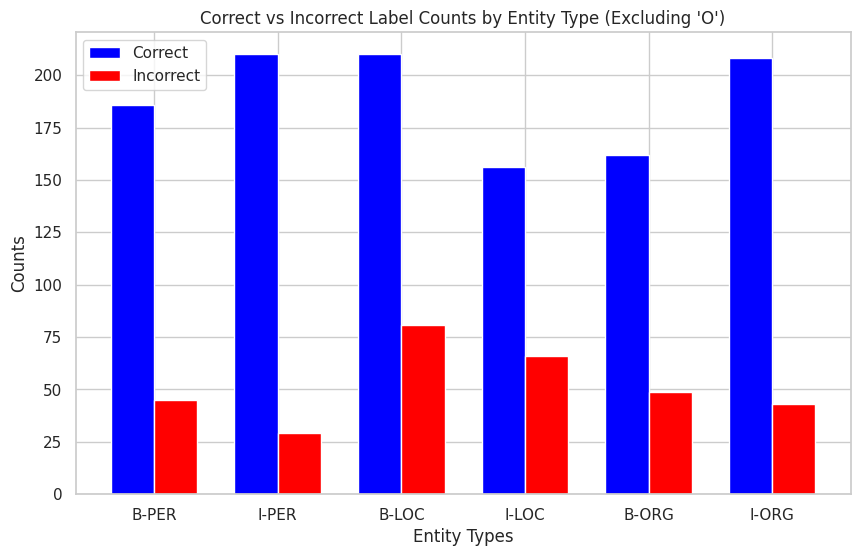

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

# Sample data
data = xlm_roberta

# Count the correct and incorrect labels per entity type, excluding 'O'
label_counts = defaultdict(lambda: {'correct': 0, 'incorrect': 0})
for sentence in data:
    for token, gold, pred in sentence:
        if gold != 'O':  # Filter out 'O' label
            if gold == pred:
                label_counts[gold]['correct'] += 1
            else:
                label_counts[gold]['incorrect'] += 1

# Prepare data for plotting
labels = list(label_counts.keys())
correct_counts = [label_counts[label]['correct'] for label in labels]
incorrect_counts = [label_counts[label]['incorrect'] for label in labels]

# Plotting
sns.set(style="whitegrid")
x = range(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x, correct_counts, width, label='Correct', color='blue')
rects2 = ax.bar([p + width for p in x], incorrect_counts, width, label='Incorrect', color='red')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Entity Types')
ax.set_ylabel('Counts')
ax.set_title('Correct vs Incorrect Label Counts by Entity Type (Excluding \'O\')')
ax.set_xticks([p + width / 2 for p in x])
ax.set_xticklabels(labels)
ax.legend()

plt.show()


DIffernt entities

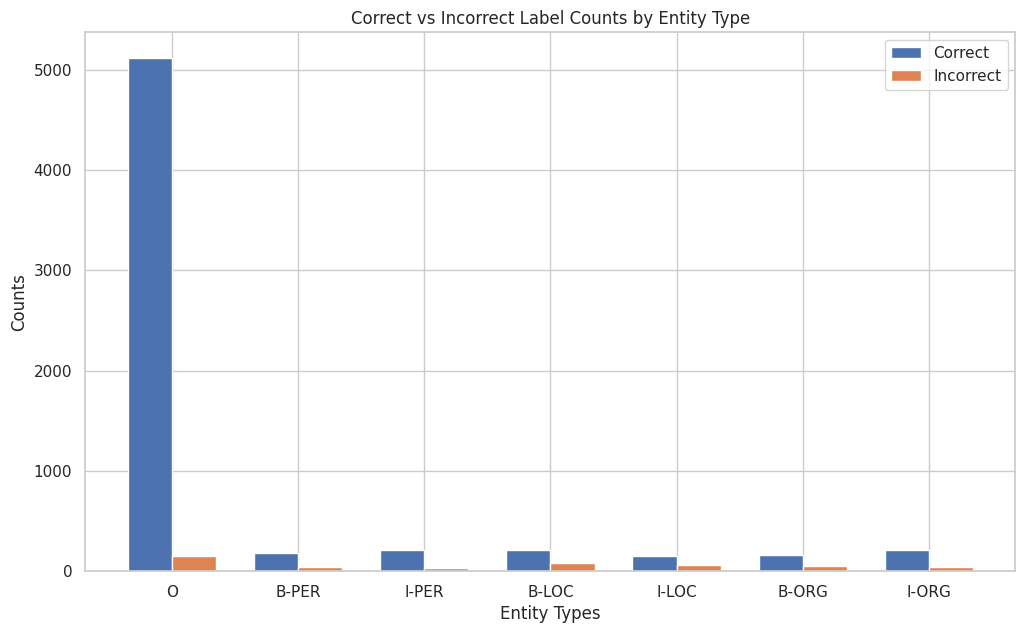

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

# Sample data
data = xlm_roberta

# Count the correct and incorrect labels per entity type
label_counts = defaultdict(lambda: {'correct': 0, 'incorrect': 0})
for sentence in data:
    for token, gold, pred in sentence:
        if gold == pred:
            label_counts[gold]['correct'] += 1
        else:
            label_counts[gold]['incorrect'] += 1

# Prepare data for plotting
labels = list(label_counts.keys())
correct_counts = [label_counts[label]['correct'] for label in labels]
incorrect_counts = [label_counts[label]['incorrect'] for label in labels]

# Plotting
sns.set(style="whitegrid")
x = range(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 7))
rects1 = ax.bar(x, correct_counts, width, label='Correct')
rects2 = ax.bar([p + width for p in x], incorrect_counts, width, label='Incorrect')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Entity Types')
ax.set_ylabel('Counts')
ax.set_title('Correct vs Incorrect Label Counts by Entity Type')
ax.set_xticks([p + width / 2 for p in x])
ax.set_xticklabels(labels)
ax.legend()

plt.show()


# Confusion Matrix

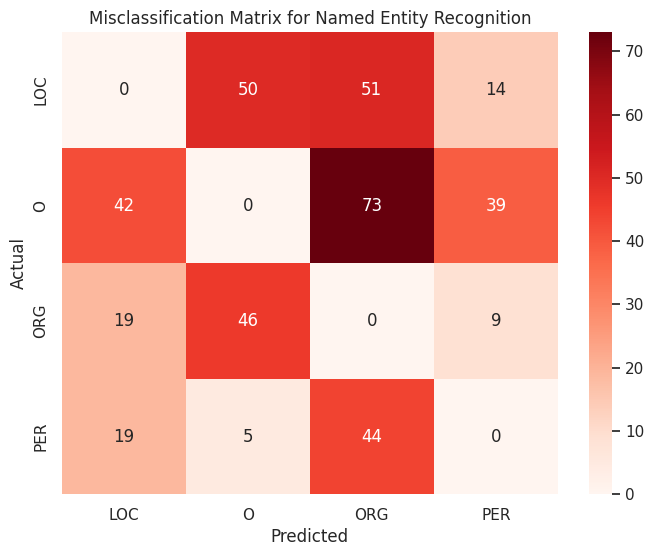

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import chain

data_dict = incorrect_xlmroberta

flattened_data = list(chain.from_iterable(data_dict.values()))

def consolidate_label(label):
    if 'ORG' in label:
        return 'ORG'
    elif 'PER' in label:
        return 'PER'
    elif 'LOC' in label:
        return 'LOC'
    else:
        return 'O'

df = pd.DataFrame(flattened_data, columns=['Token', 'Actual', 'Predicted'])

df['Actual'] = df['Actual'].apply(consolidate_label)
df['Predicted'] = df['Predicted'].apply(consolidate_label)

df = df[df['Actual'] != df['Predicted']]

if df.empty:
    print("No incorrect predictions to display.")
else:
    confusion_matrix = pd.crosstab(df['Actual'], df['Predicted'], rownames=['Actual'], colnames=['Predicted'], margins=False)

    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Reds")
    plt.title('Misclassification Matrix for Named Entity Recognition')
    plt.show()


In [ ]:
import pandas as pd
from itertools import chain

# Provided data in a nested dictionary format
data_dict = incorrect_xlmroberta

# Flatten the nested dictionary to a list
flattened_data = list(chain.from_iterable(data_dict.values()))

# Function to consolidate label categories
def consolidate_label(label):
    if 'ORG' in label:
        return 'ORG'
    elif 'PER' in label:
        return 'PER'
    elif 'LOC' in label:
        return 'LOC'
    else:
        return 'O'

# Create a DataFrame
df = pd.DataFrame(flattened_data, columns=['Token', 'Actual', 'Predicted'])

# Apply the label consolidation function to both actual and predicted labels
df['Actual'] = df['Actual'].apply(consolidate_label)
df['Predicted'] = df['Predicted'].apply(consolidate_label)

# Filter out correct predictions to focus only on incorrect ones
df = df[df['Actual'] != df['Predicted']]

# Check if the DataFrame is empty
if df.empty:
    print("No incorrect predictions to display.")
else:
    # Create a confusion matrix
    confusion_matrix = pd.crosstab(df['Actual'], df['Predicted'], rownames=['Actual'], colnames=['Predicted'], margins=False)

    # Export the confusion matrix to a CSV file
    confusion_matrix.to_csv('/content/drive/MyDrive/XLMRoberta/Output/confusion_matrix.csv')
    print("Confusion matrix has been saved to 'confusion_matrix.csv'.")


Confusion matrix has been saved to 'confusion_matrix.csv'.


In [33]:
# Example of token data, where each tuple in the list represents (word, true label, predicted label)
nested_tokens_data = xlm_roberta
# Count correct predictions and occurrences of each entity type
from collections import defaultdict

true_counts = defaultdict(int)
correct_counts = defaultdict(int)

for sentence in nested_tokens_data:
    for token, true_label, pred_label in sentence:
        true_counts[true_label] += 1
        if true_label == pred_label:
            correct_counts[true_label] += 1

# Calculate proportion of correct predictions for each entity type
proportions = {label: correct_counts[label] / true_counts[label] if true_counts[label] > 0 else 0 for label in true_counts}
proportions


{'O': 0.970794614071686,
 'B-PER': 0.8051948051948052,
 'I-PER': 0.8786610878661087,
 'B-LOC': 0.7216494845360825,
 'I-LOC': 0.7027027027027027,
 'B-ORG': 0.7677725118483413,
 'I-ORG': 0.8286852589641435}

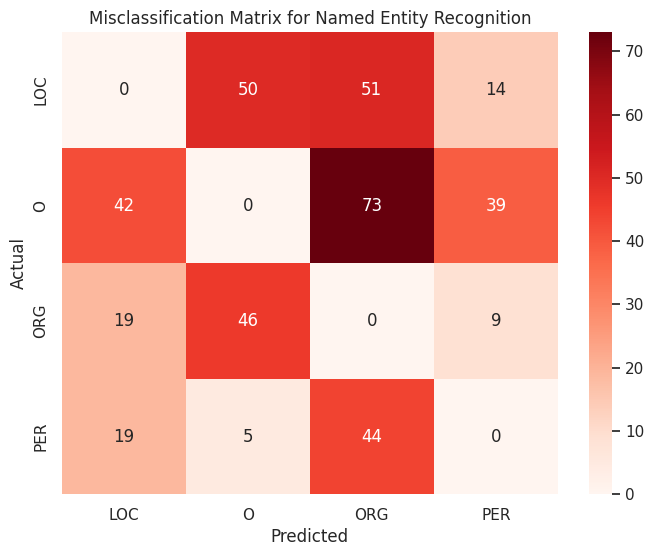

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import chain

# Flattening the list of tuples from the dictionary values
flattened_data = list(chain.from_iterable(incorrect_xlmroberta.values()))

# Helper function to consolidate labels into broader categories
def consolidate_label(label):
    if 'ORG' in label:
        return 'ORG'
    elif 'PER' in label:
        return 'PER'
    elif 'LOC' in label:
        return 'LOC'
    else:
        return 'O'

# Creating DataFrame
df = pd.DataFrame(flattened_data, columns=['Token', 'Actual', 'Predicted'])

# Applying the consolidation function
df['Actual'] = df['Actual'].apply(consolidate_label)
df['Predicted'] = df['Predicted'].apply(consolidate_label)

# Filtering out correct predictions
df = df[df['Actual'] != df['Predicted']]

if df.empty:
    print("No incorrect predictions to display.")
else:
    # Creating a confusion matrix
    confusion_matrix = pd.crosstab(df['Actual'], df['Predicted'], rownames=['Actual'], colnames=['Predicted'], margins=False)

    # Plotting the heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Reds")
    plt.title('Misclassification Matrix for Named Entity Recognition')
    plt.show()

    # Calculate the percentage of false positives for 'ORG'
    total_org_misclassifications = confusion_matrix.loc[:, 'ORG'].sum() - confusion_matrix.at['ORG', 'ORG']
    total_false_positives = df['Predicted'].value_counts().sum() - df['Actual'].value_counts().sum() + total_org_misclassifications
    org_false_positive_percentage = (total_org_misclassifications / total_false_positives) * 100 if total_false_positives > 0 else 0
    org_false_positive_percentage


In [35]:
org_false_positives_as_o = confusion_matrix.at['O', 'ORG'] if 'O' in confusion_matrix.index and 'ORG' in confusion_matrix.columns else 0

total_org_false_positives = confusion_matrix.loc[:, 'ORG'].sum() - confusion_matrix.at['ORG', 'ORG']

percentage_org_false_positives_as_o = (org_false_positives_as_o / total_org_false_positives * 100) if total_org_false_positives > 0 else 0
percentage_org_false_positives_as_o


43.452380952380956

In [36]:
mislabeled_o = []

for key, value_list in incorrect_xlmroberta.items():
    for value in value_list:
        token, true_label, predicted_label = value
        if true_label == 'O' and predicted_label in ['B-ORG', 'I-ORG']:
            mislabeled_o.append((token, true_label, predicted_label))

mislabeled_o, len(mislabeled_o)


([('▁Cho', 'O', 'B-ORG'),
  ('im', 'O', 'B-ORG'),
  ('▁)', 'O', 'B-ORG'),
  ('▁)', 'O', 'B-ORG'),
  ('▁)', 'O', 'B-ORG'),
  ('▁)', 'O', 'B-ORG'),
  ('▁Bhi', 'O', 'B-ORG'),
  ('nse', 'O', 'B-ORG'),
  ('▁Fi', 'O', 'I-ORG'),
  ('os', 'O', 'I-ORG'),
  ('raithe', 'O', 'I-ORG'),
  ('▁Cho', 'O', 'B-ORG'),
  ('n', 'O', 'B-ORG'),
  ('artha', 'O', 'B-ORG'),
  ('▁Sta', 'O', 'B-ORG'),
  ('▁Bord', 'O', 'I-ORG'),
  ('▁Teo', 'O', 'I-ORG'),
  ('ranta', 'O', 'I-ORG'),
  ('▁Euro', 'O', 'I-ORG'),
  ('▁5', 'O', 'I-ORG'),
  ('▁Gaeltachta', 'O', 'B-ORG'),
  ('í', 'O', 'B-ORG'),
  ('▁na', 'O', 'I-ORG'),
  ('▁Gael', 'O', 'B-ORG'),
  ('▁sean', 'O', 'B-ORG'),
  ('G', 'O', 'I-ORG'),
  ('hall', 'O', 'I-ORG'),
  (',', 'O', 'B-ORG'),
  (',', 'O', 'B-ORG'),
  (',', 'O', 'B-ORG'),
  (',', 'O', 'B-ORG'),
  ('▁agus', 'O', 'B-ORG'),
  ('▁Conrad', 'O', 'B-ORG'),
  ('h', 'O', 'B-ORG'),
  ('▁Conrad', 'O', 'B-ORG'),
  ('h', 'O', 'B-ORG'),
  ('▁of', 'O', 'I-ORG'),
  ('▁', 'O', 'I-ORG'),
  (',', 'O', 'I-ORG'),
  ('▁B', 'O', '